# Programming Assignment 2 Part 1 - Decision Tree

In this programming assignment, you will implement a decision tree model.

*For Even Roll Number Students:*

* In this part, you have to implement a decision tree model to predict the cardio vascular disease based on various input features.
* Noiseless Dataset: ````cardio.csv````
* Noisy Dataset: ````cardio_noise.csv````

*For Odd Roll Number Students:*

* In this part, you have to implement a decision tree model to predict whether a patient has diabetes based on various input features.
* Noiseless Dataset: ````diabetes.csv````
* Noisy Dataset: ````diabetes_noise.csv````

The assignment zip file (ML_CS60050_A2.zip) contains the respective datasets which will be used in this assignment.

You have to write your code in this jupyter notebook. You have to write your code only between ### START CODE HERE ### and ### END CODE HERE ### comments.

### Assignment Submission Instructions

Please submit your assignment as a ZIP file that contains a folder named in the following format: `RollNo_ML_A2`. Inside this folder, include two Jupyter notebooks and a Report with the following names:

1. `RollNo_A2_Part1.ipynb`
2. `RollNo_A2_Part2.ipynb`
3. `RollNo_report.pdf`


Instructions for the Report:
* Summarize results from noiseless and noisy datasets.
* Compare performance and note the impact of noise.
* Conclude with key findings and implications.

Make sure that you replace `RollNo` with your actual roll number in both the folder name and the notebook filenames.

For example, if your roll number is `23CS60R11`, the folder should be named `23CS60R11_ML_A2`, and the three files should be named `23CS60R11_A2_Part1.ipynb`, `23CS60R11_A2_Part2.ipynb` and `RollNo_report.pdf`.

Submit this ZIP file as your assignment submission.

In [ ]:
! pip install pygraphviz‑1.7‑cp312‑cp312‑win_amd64.whl

ERROR: pygraphviz‑1.7‑cp312‑cp312‑win_amd64.whl is not a valid wheel filename.


In [1]:
!apt-get install -y graphviz graphviz-dev
! pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [2]:
# Install pandas, numpy, seaborn, and matplotlib
! pip install pandas numpy seaborn matplotlib

# Install scikit-learn
! pip install scikit-learn

# Install IPython
! pip install ipython

# Install pygraphviz


! pip install pygraphviz

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.13-cp310-cp310-linux_x86_64.whl size=168501 sha256=ec434766856df6642e2250bbe7750217a7ee650d08d5036bfaae1e8707d05b77
  Stored in directory: /root/.cache/pip/wheels/c5/96/10/6c25add1fffc368b1927252bf73b63fcb938de8f4486e23691
Successfully built pygraphviz


Please follow the instructions given in the file ````graphviz_installation.txt```` to install graphviz

In [3]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from graphviz import Digraph
# from IPython.display import Image, display
import pygraphviz as pgv


In [92]:
df = pd.read_csv('diabetes_noise.csv') # Replace with noise/noiseless dataset
# df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**Train, Validation, Test split**

In [93]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=1)
train_df.shape,test_df.shape,val_df.shape

((588, 9), (185, 9), (148, 9))

In [94]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [95]:

# from matplotlib import pyplot as plt
# df.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
# plt.gca().spines[['top', 'right',]].set_visible(False)

### Model Implementation

# How the algorithm works

**We'll start with all examples at the root node then:**

**We'll calculate information gain for splitting on all possible features and pick the one with the highest value**

**Then we'll split the data according to the selected feature**

**We'll repeat this  process until stopping criteria is met**

## Key Points:

### Entropy
**Entropy function which is a way to measure impurity**

**Entropy is represented by this function**
$$H = -\sum\limits_{}^{} p_{i}\text{log}_2 p_{i}
$$

**Where $(p_1)$ is the fraction of examples that are a certain class**


### Information Gain

**Information gain is the reduction in entropy when he make a split**

**Recall that our goal is to choose the split that gives the highest information gain, information gain equation =**

**$$H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$**
**where**
- $H(p_1^\text{node})$ is entropy at the node
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch respectively



### Decision Tree visualization using graphviz

In [96]:
graph = pgv.AGraph(strict=True, directed=True)
graph2 = pgv.AGraph(strict=True, directed=True)

## Start the Implementation

In [97]:


# Define the Node and DecisionTree classes
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class DecisionTree:
    def __init__(self, min_samples_split=2):
        self.root = None  # Initialize as None, will be set in fit()
        self.height = -1
        self.min_samples_split = min_samples_split
        self.attributes = None

    def find_splits(self, data, column_index):
        x = data[:, :-1]
        potential_splits = []
         ### START CODE HERE ###
        values = np.unique(x[:, column_index])
        for i in range(len(values) - 1):
            split = (values[i] + values[i + 1]) / 2
            potential_splits.append(split)
            ### END CODE HERE ###
        return potential_splits

    def calculate_entropy(self, data):
        y = data[:, -1]
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
          ### START CODE HERE ###
        entropy = -np.sum(probabilities * np.log2(probabilities))
         ### END CODE HERE ###
        return entropy

    def calculate_information_gain(self, data, column_no, value):
        parent_entropy = self.calculate_entropy(data)
        left_data = data[data[:, column_no] <= value]
        right_data = data[data[:, column_no] > value]
 ### START CODE HERE ###
        n = len(left_data) + len(right_data)
        p_left_data = len(left_data) / n
        p_right_data = len(right_data) / n
### START CODE HERE ###
        child_entropy = (p_left_data * self.calculate_entropy(left_data) +
                         p_right_data * self.calculate_entropy(right_data))

        information_gain = parent_entropy - child_entropy
        ### END CODE HERE ###
        return information_gain

    def majority(self, data):
        cls, count = np.unique(data[:, -1], return_counts=True)
        return cls[np.argmax(count)]

    def classify(self, data, edge):
        classification = self.majority(data)
        entropy = self.calculate_entropy(data)
        d = {"ID": "Leaf", "Classification": classification, "Parent_Edge": edge, "Entropy": entropy, "Samples": data.shape[0]}
        leaf = Node(d)
        return leaf

    def build_tree(self, data, max_depth, attributes, edge, height):

      ### START CODE HERE ###
      if height >= max_depth or len(data) < self.min_samples_split:
        return self.classify(data, edge)

      if len(np.unique(data[:, -1])) == 1:
        return self.classify(data, edge)

      if not attributes or height >= max_depth:
          return self.classify(data, edge)
 ### END CODE HERE ###
# Initialize the best split tracking dictionary
      best = {"ID": "", "best_attribute": "", "best_gain": -1, "best_split": -1, "best_entropy": -1}

      # Iterate over attributes and evaluate splits
      for i, attr in enumerate(attributes):
        potential_splits = self.find_splits(data, i)

        best_split = max(
            potential_splits,
            key=lambda split: self.calculate_information_gain(data, i, split),
            default=None
        )

        if best_split is not None:
              gain = self.calculate_information_gain(data, i, best_split)
              if gain > best["best_gain"]:
                  best["best_attribute"] = attr
                  best["best_gain"] = gain
                  best["best_split"] = best_split
                  best["best_entropy"] = self.calculate_entropy(data)

        # If no valid split was found, classify the data
      if best["best_gain"] == -1:
        return self.classify(data, edge)

      # Get the index of the best attribute
      best_attr_index = np.where(self.attributes == best["best_attribute"])[0][0]            ### END HERE ###
      # Use the index to access the column
      _, sample = np.unique(data[:, best_attr_index], return_counts=True)  # Change here

      d = {
          "ID": best["best_attribute"],
          "Entropy": best["best_entropy"],
          "Samples": data.shape[0],
          "Parent_Edge": edge,
          "Best_Split": best["best_split"],
          "Values": sample
      }

      node = Node(d)
      node.left = self.build_tree(data[data[:, best_attr_index] <= best["best_split"]], max_depth, attributes, 2 * edge + 1, height + 1)
      node.right = self.build_tree(data[data[:, best_attr_index] > best["best_split"]], max_depth, attributes, 2 * edge + 2, height + 1)

      root = f'{d["ID"]} <= {d["Best_Split"]}\nEntropy = {d["Entropy"]}\nSamples = {d["Samples"]}\nValues = {sample}'

      graph.add_node(str(edge), label=root)
      graph.add_edge(str(edge), str(2 * edge + 1))
      graph.add_edge(str(edge), str(2 * edge + 2))
      return node



    def fit(self, data, max_depth=100):
        attributes = data.columns.tolist()[:-1]
        self.attributes = np.array(attributes)
        self.root = self.build_tree(data.values, max_depth, attributes, 0, 0)
        self.height = self.calculate_height(self.root)  # Calculate height after tree is built
        num_nodes = self.count_nodes(self.root)  # Calculate number of nodes
        print(f"Tree Height: {self.height}")
        print(f"Number of Nodes: {num_nodes}")

    def plt(self, graph, node, vert):
        d = node.data
        if "Classification" in node.data.keys():
            root = f'{d["ID"]}\nEntropy = {d["Entropy"]}\nSamples = {d["Samples"]}\nClass = {d["Classification"]}'
            graph.add_node(str(vert), label=root)
            return root

        root = f'{d["ID"]} <= {d["Best_Split"]}\nEntropy = {d["Entropy"]}\nSamples = {d["Samples"]}'
        graph.add_node(str(vert), label=root)
        root1 = self.plt(graph, node.left, 2 * vert + 1)
        root2 = self.plt(graph, node.right, 2 * vert + 2)

        graph.add_edge(str(vert), str(2 * vert + 1))
        graph.add_edge(str(vert), str(2 * vert + 2))
        return root

    def prune(self, val_df, node):
        if "Classification" in node.data.keys():
            return
  ### START CODE HERE ###
        self.prune(val_df, node.left)
        self.prune(val_df, node.right)
 ### END CODE HERE ###
        curr_val = accuracy_score(val_df["Outcome"], self.predict(val_df.drop(columns=["Outcome"]).values))

        tmp1 = node.left
        tmp2 = node.right
        tmp = node.data
        node.left = None
        node.right = None

        node.data = self.prune_util(node)

        new_val = accuracy_score(val_df["Outcome"], self.predict(val_df.drop(columns=["Outcome"]).values))
         ### START CODE HERE ###
        if new_val < curr_val:
            node.data = tmp
            node.left = tmp1
            node.right = tmp2


        ### END CODE HERE ###

    def predict_one(self, data):

        node = self.root
        while "Classification" not in node.data.keys():
            d = node.data
            attribute_index = np.where(self.attributes == d["ID"])[0][0]
            if data[attribute_index] <= d["Best_Split"]:
                node = node.left
            else:
                node = node.right
        return node.data["Classification"]


    def predict(self, X):
 ### START CODE HERE ###
        result = []
        for x in X:
          result.append(self.predict_one(x))
        return np.array(result)


 ### END CODE HERE ###
    def prune_util(self, node):
        d = {"ID": "Leaf", "Classification": 0, "Parent_Edge": node.data["Parent_Edge"],
             "Entropy": 0, "Samples": node.data["Samples"]}
        if node.data["Values"][0] > node.data["Values"][1]:
            d["Classification"] = 0
        else:
            d["Classification"] = 1
        return d


    def count_nodes(self, node):
        if node is None:
            return 0
        return 1 + self.count_nodes(node.left) + self.count_nodes(node.right)
    def calculate_height(self, node):
      if node is None:
          return -1  # Height of an empty tree
      left_height = self.calculate_height(node.left)
      right_height = self.calculate_height(node.right)
      return max(left_height, right_height) + 1

# # Train the decision tree model
# model = DecisionTree()
# model.fit(train_df)

# # Plot the tree before pruning
# _ = model.plt(graph, model.root, 0)
# graph.draw("Decision_Tree_Before_Pruning.png", prog="dot")
# display(Image(filename='Decision_Tree_Before_Pruning.png'))

# # Test the model before pruning
# X_test = test_df.values[:, :-1]
# Y_test = test_df.values[:, -1]
# Y_pred = model.predict(X_test)

# # Display metrics before pruning
# print("Accuracy, Precision, Recall Before Pruning:")
# print(accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred, average='macro'), recall_score(Y_test, Y_pred, average='macro'))

# # Prune the tree and visualize the pruned tree
# model.prune(val_df, model.root)
# _ = model.plt(graph2, model.root, 0)
# graph2.draw("Decision_Tree_After_Pruning.png", prog="dot")
# display(Image(filename='Decision_Tree_After_Pruning.png'))

# # Test the model after pruning
# Y_pred = model.predict(X_test)
# print("Accuracy, Precision, Recall After Pruning:")
# print(accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred, average='macro'), recall_score(Y_test, Y_pred, average='macro'))
model = DecisionTree()
model.fit(train_df)

Tree Height: 21
Number of Nodes: 371


In [98]:
model = DecisionTree()
model.fit(train_df)

Tree Height: 21
Number of Nodes: 371


AttributeError: 'DecisionTree' object has no attribute 'calculate_height'

### Plotting the Decision Tree before Pruning

In [99]:
graph.draw("Decision_Tree_Before_Pruning.png", prog="dot")

In [100]:
#Import the IPython library
from IPython.display import Image
display(Image(filename='Decision_Tree_Before_Pruning.png'))

### Testing before Pruning

In [101]:
X_test = test_df.values[:,:-1].tolist() # Convert X_test to a list of lists
Y_test = test_df.values[:,-1]

In [103]:
Y_pred = model.predict(X_test)

In [104]:
print("Accuracy,Macro Precision, Macro Recall Before Pruning")
accuracy_score(Y_test,Y_pred),precision_score(Y_test,Y_pred,average='macro'),recall_score(Y_test,Y_pred,average = 'macro')

Accuracy,Macro Precision, Macro Recall Before Pruning


(0.4810810810810811, 0.4593166175024582, 0.4600434572670208)

### Reduced Error Pruning

In [105]:
model.prune(val_df,model.root)
model.height = model.calculate_height(model.root)
num_nodes = model.count_nodes(model.root)
print(f"Tree Height After Pruning: {model.height}")
print(f"Number of Nodes After Pruning: {num_nodes}")

Tree Height After Pruning: 12
Number of Nodes After Pruning: 47


In [106]:
_ =model.plt(graph2,model.root,0)

In [107]:
graph2.draw("Decision_Tree_After_Pruning.png", prog="dot")

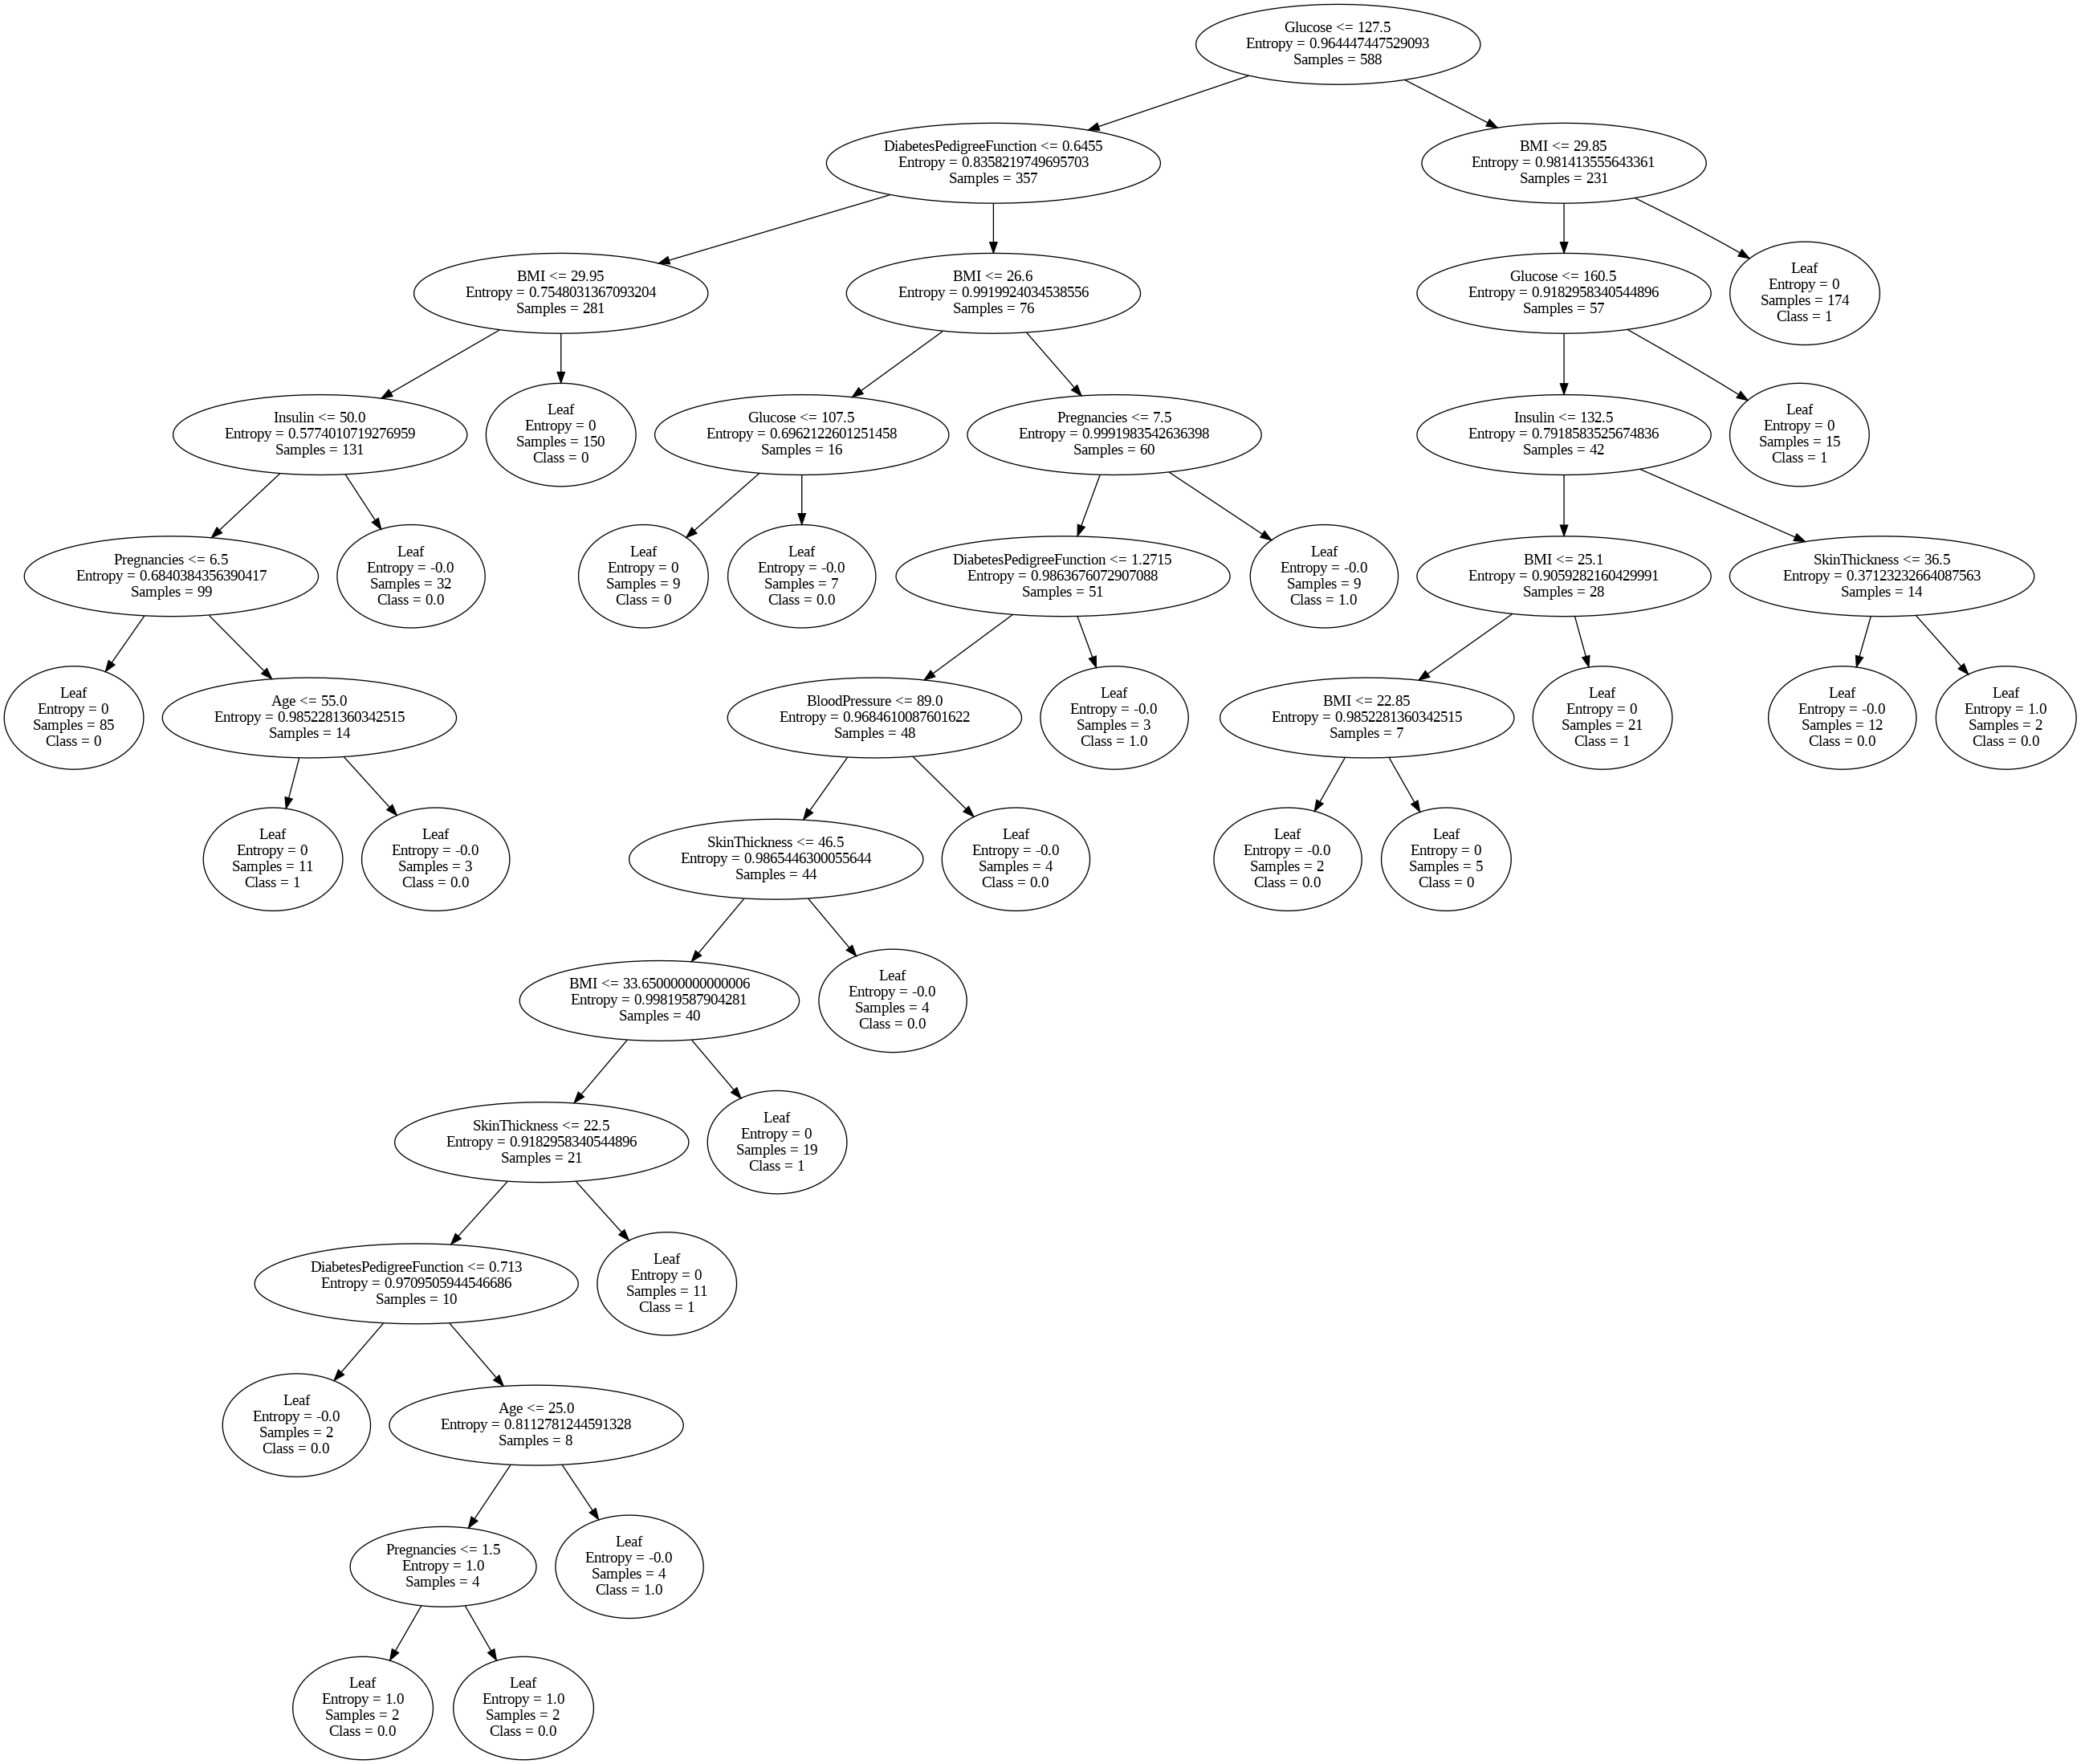

In [108]:
display(Image(filename='Decision_Tree_After_Pruning.png'))

### Testing after Pruning

In [109]:
Y_pred = model.predict(X_test)
print("Accuracy,Macro Precision, Macro Recall After Pruning")
accuracy_score(Y_test,Y_pred),precision_score(Y_test,Y_pred,average='macro'),recall_score(Y_test,Y_pred,average = 'macro')

Accuracy,Macro Precision, Macro Recall After Pruning


(0.6054054054054054, 0.5943993312634344, 0.5954249154997586)